In [55]:
import numpy as np
import pandas as pd
from parser_random_exp import parse_results
import matplotlib.pyplot as plt
!pip install -q seaborn tqdm
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
data, params = parse_results()

100%|██████████| 4/4 [00:00<00:00, 140.62it/s]


In [63]:
met = 'many_es_to_one_gt_accuracy/gan_tokens'
res = data[data['name'] == met].round(2)
best_for_run = res.groupby(['exp_id', '_try', 'name'])['exp_id', '_try', 'name', 'value'].max()
data = pd.merge(params, best_for_run,left_index=True, right_on='exp_id',  how='outer')


In [64]:
data.groupby('maxpool_reduction')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
maxpool_reduction,,,,,,,,
8,2.0,0.2500,0.014142,0.24,0.2450,0.25,0.255,0.26
16,4.0,0.2675,0.015000,0.25,0.2575,0.27,0.280,0.28
32,2.0,0.2600,0.000000,0.26,0.2600,0.26,0.260,0.26


In [65]:
data.groupby(['hidden_2_size', 'maxpool_reduction'])['value'].describe().sort_values('max')

,,count,mean,std,min,25%,50%,75%,max
hidden_2_size,maxpool_reduction,,,,,,,,
512,8,2.0,0.250,0.014142,0.24,0.2450,0.250,0.2550,0.26
2048,32,2.0,0.260,0.000000,0.26,0.2600,0.260,0.2600,0.26
512,16,2.0,0.270,0.014142,0.26,0.2650,0.270,0.2750,0.28
1024,16,2.0,0.265,0.021213,0.25,0.2575,0.265,0.2725,0.28


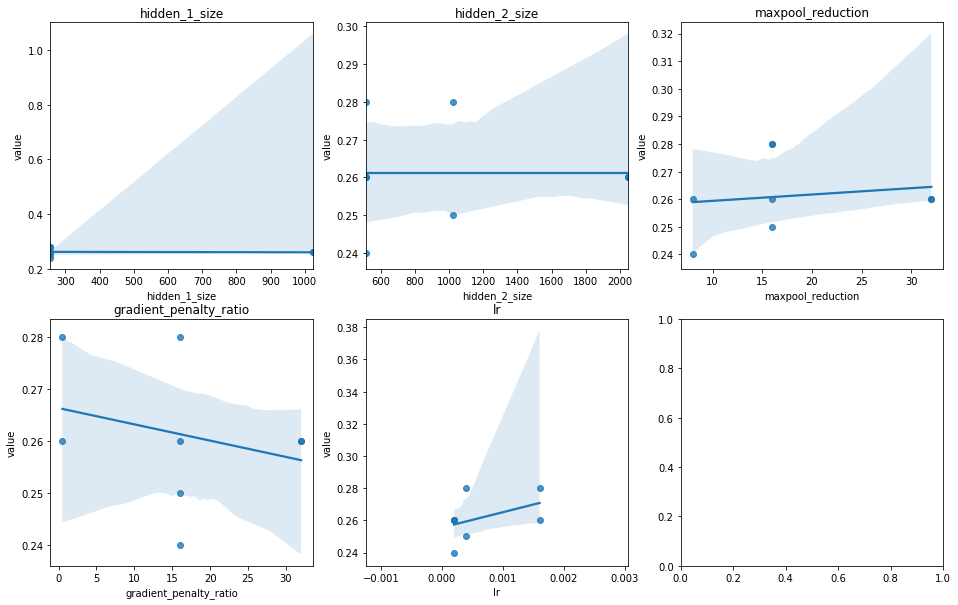

In [66]:
fig, axs = plt.subplots(2,3, figsize=(16,10))
for i, param in enumerate(params.columns.to_list()):
    sns.regplot(x=param, y='value',data=data, ax=axs.flatten()[i]).set_title(param)
